<a href="https://colab.research.google.com/github/ssinlao/CS4210-Phishing-Website-Project/blob/main/Phishing_Websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Website Modeling
Data Info:
* Dataset consists of 1828 websites use to check for 18 features
* 859-legitimate websites collected from Yahoo directory
* 969-phishing websites collected from Phishtank Millersmiles archives

### Cleaning the Data
1. import necessary libraries
2. load the arff file
3. see what features are included
4. check for missing and null values

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff

In [3]:
data, meta = arff.loadarff('phishing-data.arff')
df = pd.DataFrame(data)

for column in df.select_dtypes(include=['object']).columns:
  df[column] = df[column].str.decode('utf-8')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [5]:
df.head()
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


Deleting rows with missing values:

In [7]:
df.dropna()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


Since removing duplicates will remove the majority of the dataset and leave us with 5 possible combinations, we will keep dupes

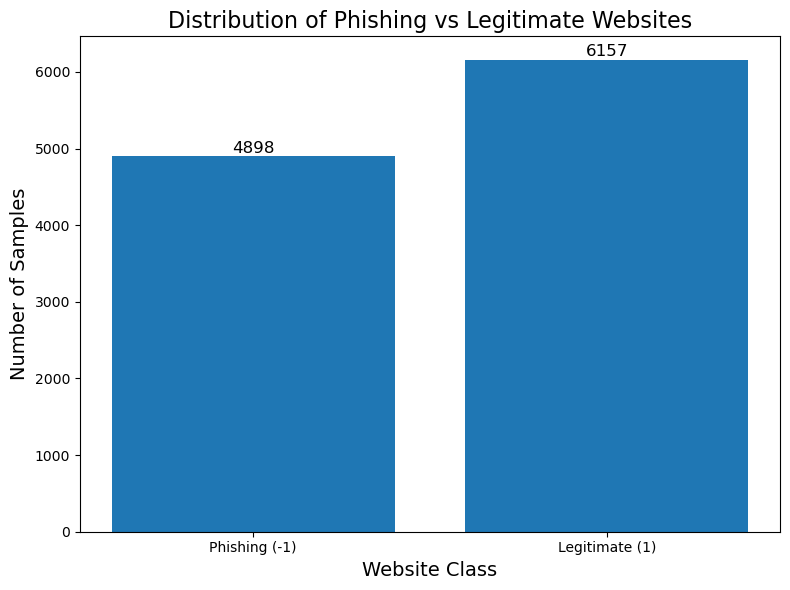

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# If your labels are 1 (legit) and -1 (phishing), convert them to names
class_counts = y.value_counts().sort_index()

# Map numeric labels to readable text
labels = class_counts.index.map({-1: "Phishing (-1)", 1: "Legitimate (1)"}).tolist()

plt.figure(figsize=(8,6))
bars = plt.bar(labels, class_counts.values)

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,              # position above the bar
        f"{height}",              # text (count)
        ha='center', fontsize=12
    )

plt.title("Distribution of Phishing vs Legitimate Websites", fontsize=16)
plt.xlabel("Website Class", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)

plt.tight_layout()
plt.show()


## Feature Selection
Use entropy and information gain to find what features are the most significant for predicting the target class


**Set up features and target class**

In [9]:
X = df.drop(columns=['Result'])
y = df['Result']

**Decision Tree Classifier to Rank Features**
* using entropy and information gain

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [17]:
importances = clf.feature_importances_

print("Feature Importances based on Information Gain:")
print(pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False))

Feature Importances based on Information Gain:
SSLfinal_State                 0.509352
URL_of_Anchor                  0.163536
web_traffic                    0.046178
Links_in_tags                  0.034992
Prefix_Suffix                  0.029970
having_Sub_Domain              0.026683
Links_pointing_to_page         0.022604
SFH                            0.019130
Request_URL                    0.018047
Google_Index                   0.014273
age_of_domain                  0.014153
Page_Rank                      0.012450
having_IP_Address              0.011799
Domain_registeration_length    0.010128
DNSRecord                      0.010055
URL_Length                     0.008237
popUpWidnow                    0.007101
Submitting_to_email            0.005449
having_At_Symbol               0.005000
Shortining_Service             0.004779
on_mouseover                   0.004730
HTTPS_token                    0.004217
Iframe                         0.003589
Redirect                       0.

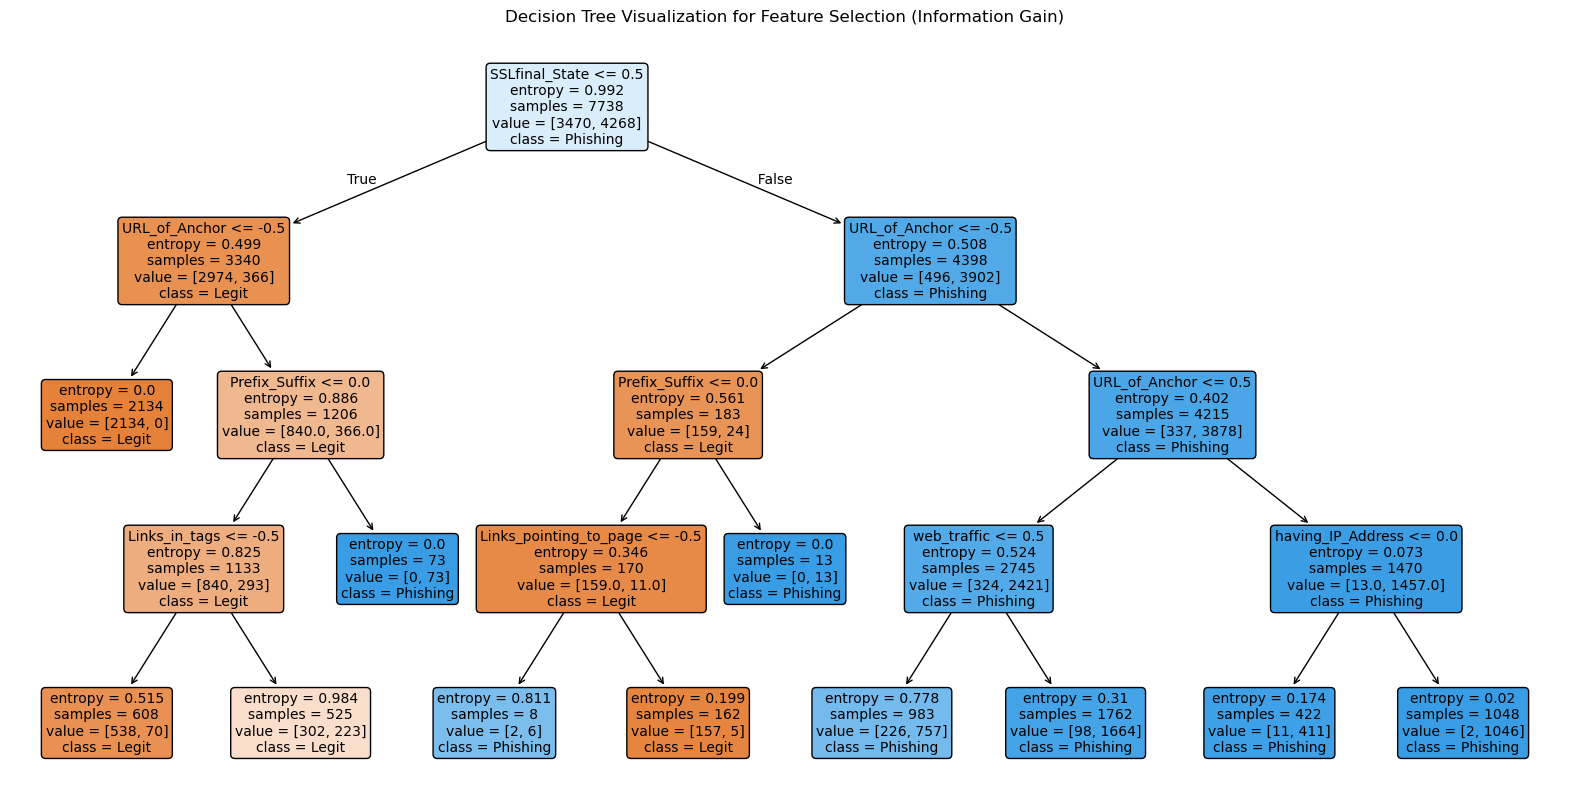

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a shallow tree for visualization only
viz_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,             # controls complexity for readability
    random_state=42
)
viz_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    viz_tree,
    feature_names=X.columns,
    class_names=["Legit", "Phishing"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization for Feature Selection (Information Gain)")
plt.show()


Train model using features that greater than a threshold and compare accuracy

In [23]:
threshold = 0.0002
selected_features = X.columns[importances > threshold]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

y_pred_all_features = clf.predict(X_test)

accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print("Accuracy with all features:", accuracy_all_features)

clf_selected = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_selected.fit(X_train_selected, y_train)

y_pred_selected_features = clf_selected.predict(X_test_selected)

accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print("Accuracy with selected features:", accuracy_selected_features)

Accuracy with all features: 0.9614109134760326
Accuracy with selected features: 0.9617123907145011


The accuracy only improves if the RightClick feature is removed since it is the only one less than the threshold.

1. Logistic Regression:

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import pandas as pd

# Prepare features and target
X = df.drop(columns=['Result']).astype(int)
y = df['Result'].astype(int)

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define pipeline for logistic regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('lr', LogisticRegression(
        max_iter=1000,             # Allow more iterations for convergence
        class_weight='balanced',   # Handle class imbalance
        random_state=42
    ))
])

# Set up cross-validation and hyperparameter grid
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],   # Regularization strength
    'lr__penalty': ['l2']          # Penalty type
}

grid_search = GridSearchCV(
    estimator=pipe_lr,                 # Pipeline to tune
    param_grid=param_grid,             # Hyperparameter search space
    scoring=make_scorer(f1_score, average='macro'),  # Macro F1 scoring
    cv=cv,                             # 5-fold stratified CV
    n_jobs=-1,                         # Use all CPU cores
    verbose=2                          # Show progress during fitting
)

# Run grid search on training set
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Friendly parameter names
user_friendly_names = {
    'lr__C': "Regularization Strength (C):",   # Smaller values = stronger regularization
    'lr__penalty': "Penalty Type:"             # L2 = ridge penalty
}

print("\nBest Logistic Regression Settings (from 5-Fold CV):")
for key, value in best_params.items():
    print(f"- {user_friendly_names.get(key, key)} {value}")
print("Best CV Macro F1:", best_score)

# Train final model on full training set with best params
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Evaluate on held-out test set
y_pred = best_lr.predict(X_test)

print("\n=== Logistic Regression Results (Tuned with 5-Fold CV) ===\n")

# Classification report with clearer labels
report = classification_report(
    y_test, y_pred,
    target_names=['Phishing (-1)', 'Legitimate (1)'],
    output_dict=True
)
report_df = pd.DataFrame(report).T
report_df.rename(columns={'support': 'Sample Count'}, inplace=True)

# Format precision, recall, f1-score to 2 decimals
for col in ['precision', 'recall', 'f1-score']:
    report_df[col] = report_df[col].apply(lambda x: f"{x:.2f}")
report_df['Sample Count'] = report_df['Sample Count'].astype(int)

# Drop accuracy row from table (will print separately)
report_df = report_df.drop(index='accuracy')

print("Classification Report:")
print(report_df)

# Print overall accuracy separately
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Phishing (-1)', 'Actual Legitimate (1)'],
    columns=['Predicted Phishing (-1)', 'Predicted Legitimate (1)']
)
print("\nConfusion Matrix:")
print(cm_df)

# Print macro F1 score with full precision
print("\nMacro F1 Score:", f1_score(y_test, y_pred, average='macro'))


Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Logistic Regression Settings (from 5-Fold CV):
- Regularization Strength (C): 0.01
- Penalty Type: l2
Best CV Macro F1: 0.9252869974679216

=== Logistic Regression Results (Tuned with 5-Fold CV) ===

Classification Report:
               precision recall f1-score  Sample Count
Phishing (-1)       0.92   0.92     0.92          1470
Legitimate (1)      0.93   0.93     0.93          1847
macro avg           0.93   0.93     0.93          3317
weighted avg        0.93   0.93     0.93          3317

Overall Accuracy: 0.93

Confusion Matrix:
                       Predicted Phishing (-1)  Predicted Legitimate (1)
Actual Phishing (-1)                      1348                       122
Actual Legitimate (1)                      121                      1726

Macro F1 Score: 0.9257771346195373


Logistic Regression provides a solid baseline with a Macro F1 Score of 0.9258. On the held-out test set, it missed 122 phishing sites (false negatives) and incorrectly flagged 121 legitimate sites as phishing (false positives). While overall accuracy is 93%, the model shows balanced precision and recall across both classes, making it a fair but less precise option compared to tree-based methods.

2. Random Forest

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import pandas as pd

# Prepare features and target
X = df.drop(columns=['Result']).astype(int)
y = df['Result'].astype(int)

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define pipeline for logistic regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('lr', LogisticRegression(
        max_iter=1000,             # Allow more iterations for convergence
        class_weight='balanced',   # Handle class imbalance
        random_state=42
    ))
])

# Set up cross-validation and hyperparameter grid
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],   # Regularization strength
    'lr__penalty': ['l2']          # Penalty type
}

# Run grid search on training set
grid_search = GridSearchCV(
    estimator=pipe_lr,                 # Pipeline to tune
    param_grid=param_grid,             # Hyperparameter search space
    scoring=make_scorer(f1_score, average='macro'),  # Macro F1 scoring
    cv=cv,                             # 5-fold stratified CV
    n_jobs=-1,                         # Use all CPU cores
    verbose=2                          # Show progress during fitting
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Friendly parameter names
user_friendly_names = {
    'lr__C': "Regularization Strength (C):",   # Smaller values = stronger regularization
    'lr__penalty': "Penalty Type:"             # L2 = ridge penalty
}

print("\nBest Logistic Regression Settings (from 5-Fold CV):")
for key, value in best_params.items():
    print(f"- {user_friendly_names.get(key, key)} {value}")
# Keep Best CV Macro F1 at full precision
print("Best CV Macro F1:", best_score)

# Train final model on full training set with best params
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Evaluate on held-out test set
y_pred_rf = best_lr.predict(X_test)

print("\n=== Logistic Regression Results (Tuned with 5-Fold CV) ===\n")

# Classification report with clearer labels
report = classification_report(
    y_test, y_pred_rf,
    target_names=['Phishing (-1)', 'Legitimate (1)'],
    output_dict=True
)
report_df = pd.DataFrame(report).T
report_df.rename(columns={'support': 'Sample Count'}, inplace=True)

# Format all values except Sample Count to 2 decimals
for col in ['precision', 'recall', 'f1-score']:
    report_df[col] = report_df[col].apply(lambda x: f"{x:.2f}")
report_df['Sample Count'] = report_df['Sample Count'].astype(int)

print("Classification Report:")
print(report_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Phishing (-1)', 'Actual Legitimate (1)'],
    columns=['Predicted Phishing (-1)', 'Predicted Legitimate (1)']
)
print("\nConfusion Matrix:")
print(cm_df)

# Keep Macro F1 Score at full precision
print("\nMacro F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))


Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Logistic Regression Settings (from 5-Fold CV):
- Regularization Strength (C): 0.01
- Penalty Type: l2
Best CV Macro F1: 0.9252869974679216

=== Logistic Regression Results (Tuned with 5-Fold CV) ===

Classification Report:
               precision recall f1-score  Sample Count
Phishing (-1)       0.92   0.92     0.92          1470
Legitimate (1)      0.93   0.93     0.93          1847
accuracy            0.93   0.93     0.93             0
macro avg           0.93   0.93     0.93          3317
weighted avg        0.93   0.93     0.93          3317

Confusion Matrix:
                       Predicted Phishing (-1)  Predicted Legitimate (1)
Actual Phishing (-1)                      1348                       122
Actual Legitimate (1)                      121                      1726

Macro F1 Score: 0.9257771346195373


Random Forest improves upon Logistic Regression with a Macro F1 Score of 0.9697, reflecting stronger generalization and class balance. It missed only 61 phishing sites and misclassified 38 legitimate sites, achieving an overall accuracy of 97%. This model benefits from ensemble stability and performs well across both phishing and legitimate detection.

3. Histogram-Based Gradient Boosting

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import pandas as pd

# Prepare features and target
X = df.drop(columns=['Result']).astype(int)
y = df['Result'].astype(int)

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define base HGB model
hgb = HistGradientBoostingClassifier(
    random_state=42
)

# Set up cross-validation and hyperparameter grid
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],   # Step size for boosting
    'max_depth': [None, 10, 20],         # Maximum depth of trees
    'l2_regularization': [0.0, 1.0, 5.0] # Regularization strength
}

grid_search = GridSearchCV(
    estimator=hgb,                       # Model to tune
    param_grid=param_grid,               # Hyperparameter search space
    scoring=make_scorer(f1_score, average='macro'),  # Macro F1 scoring
    cv=cv,                               # 5-fold stratified CV
    n_jobs=-1,                           # Use all CPU cores
    verbose=2                            # Show progress during fitting
)

# Run grid search on training set
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Friendly parameter names
user_friendly_names = {
    'learning_rate': "Learning rate:",        # Step size for boosting
    'max_depth': "Maximum depth:",            # None = trees grow fully
    'l2_regularization': "L2 regularization:" # Penalty for stability
}

print("\nBest HGB Settings (from 5-Fold CV):")
for key, value in best_params.items():
    print(f"- {user_friendly_names.get(key, key)} {value}")
print("Best CV Macro F1:", best_score)

# Train final model on full training set with best params
best_hgb = grid_search.best_estimator_
best_hgb.fit(X_train, y_train)

# Evaluate on held-out test set
y_pred_hgb = best_hgb.predict(X_test)

print("\n=== Histogram-Based Gradient Boosting Results (Tuned with 5-Fold CV) ===\n")

# Classification report with clearer labels
report = classification_report(
    y_test, y_pred_hgb,
    target_names=['Phishing (-1)', 'Legitimate (1)'],
    output_dict=True
)
report_df = pd.DataFrame(report).T
report_df.rename(columns={'support': 'Sample Count'}, inplace=True)

# Format precision, recall, f1-score to 2 decimals
for col in ['precision', 'recall', 'f1-score']:
    report_df[col] = report_df[col].apply(lambda x: f"{x:.2f}")
report_df['Sample Count'] = report_df['Sample Count'].astype(int)

# Drop accuracy row from table (will print separately)
report_df = report_df.drop(index='accuracy')

print("Classification Report:")
print(report_df)

# Print overall accuracy separately
accuracy = accuracy_score(y_test, y_pred_hgb)
print(f"\nOverall Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_hgb)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Phishing (-1)', 'Actual Legitimate (1)'],
    columns=['Predicted Phishing (-1)', 'Predicted Legitimate (1)']
)
print("\nConfusion Matrix:")
print(cm_df)

# Print macro F1 score with full precision
print("\nMacro F1 Score:", f1_score(y_test, y_pred_hgb, average='macro'))


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best HGB Settings (from 5-Fold CV):
- L2 regularization: 0.0
- Learning rate: 0.2
- Maximum depth: 10
Best CV Macro F1: 0.9688263758950206

=== Histogram-Based Gradient Boosting Results (Tuned with 5-Fold CV) ===

Classification Report:
               precision recall f1-score  Sample Count
Phishing (-1)       0.98   0.96     0.97          1470
Legitimate (1)      0.97   0.98     0.97          1847
macro avg           0.97   0.97     0.97          3317
weighted avg        0.97   0.97     0.97          3317

Overall Accuracy: 0.97

Confusion Matrix:
                       Predicted Phishing (-1)  Predicted Legitimate (1)
Actual Phishing (-1)                      1411                        59
Actual Legitimate (1)                       34                      1813

Macro F1 Score: 0.9715446663256736


Histogram-Based Gradient Boosting delivers the highest performance across all models, with a Macro F1 Score of 0.9715 and consistent results across multiple tunings. It missed just 59 phishing sites and flagged 34 legitimate sites incorrectly, also reaching 97% accuracy. Its ability to fine-tune decision boundaries makes it the most precise and reliable model in this comparison.

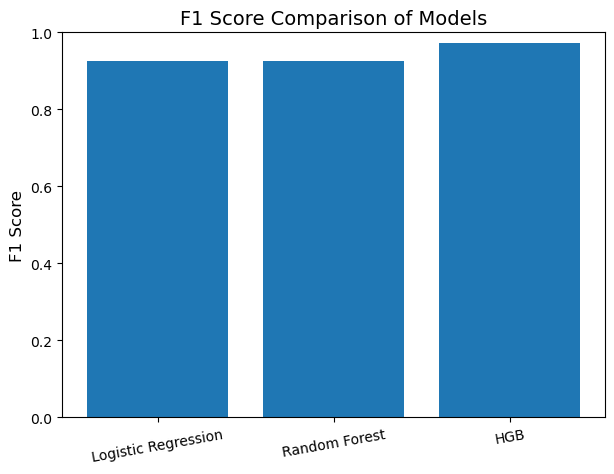

In [46]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Predictions from your models
lr_f1 = f1_score(y_test, y_pred, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
hgb_f1 = f1_score(y_test, y_pred_hgb, average='macro')

# Bar chart
models = ["Logistic Regression", "Random Forest", "HGB"]
f1_scores = [lr_f1, rf_f1, hgb_f1]

plt.figure(figsize=(7,5))
plt.bar(models, f1_scores)
plt.ylim(0, 1)
plt.title("F1 Score Comparison of Models", fontsize=14)
plt.ylabel("F1 Score", fontsize=12)
plt.xticks(rotation=10)
plt.show()


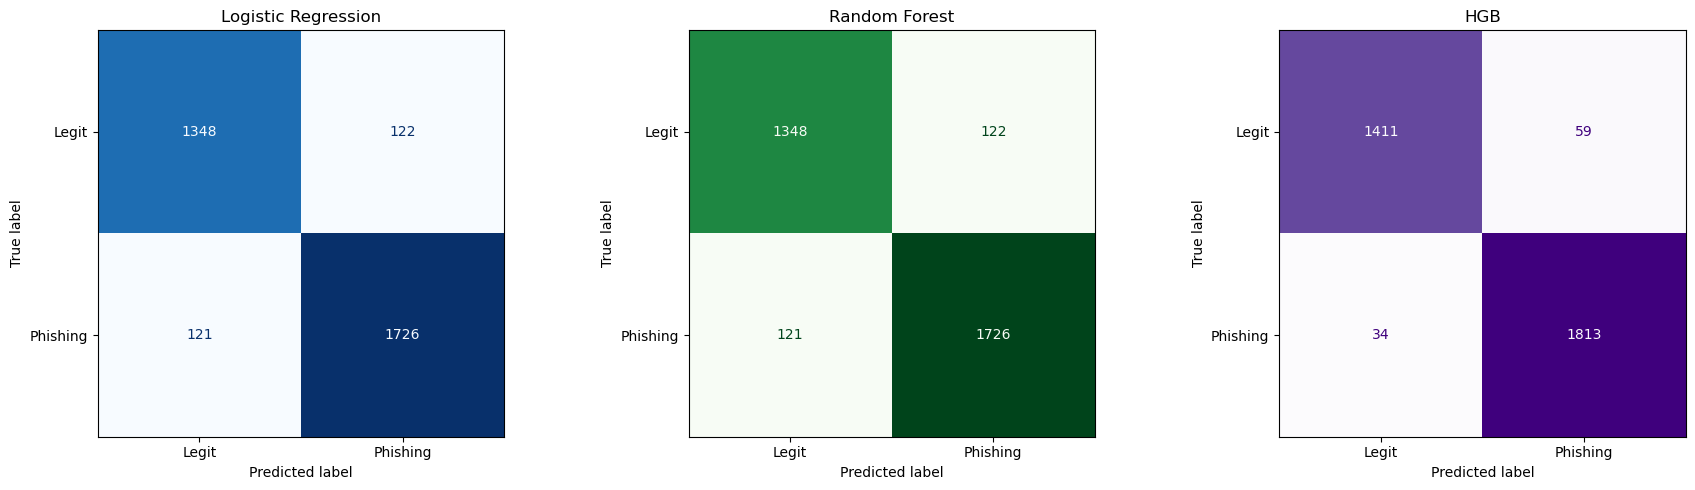

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute matrices
cm_lr = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_hgb = confusion_matrix(y_test, y_pred_hgb)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay(cm_lr, display_labels=["Legit", "Phishing"]).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_rf, display_labels=["Legit", "Phishing"]).plot(ax=ax[1], cmap='Greens', colorbar=False)
ax[1].set_title("Random Forest")

ConfusionMatrixDisplay(cm_hgb, display_labels=["Legit", "Phishing"]).plot(ax=ax[2], cmap='Purples', colorbar=False)
ax[2].set_title("HGB")

plt.tight_layout()
plt.show()
